# Bayesian Optimization of Neural Network Learning Rate

Here a single node neural network is used to evaluate the correlation between the Google Trends score of "bitcoin" and the price of BTC on the Bitfinex exchange over time. 

<img src="bitcoin.png">

<img src="Google-Trends.png">


The learning rate of this neural network will be optimized using bayesian optimization.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Data Preprocessing

I collected two CSVs for this investigation. The first details the daily prices of Bitcoin in USD on Bitfinex, a major bitcoin exchange. The second states the Google Trends score for the "bitcoin" search term on a weekly basis. 

I have matched each week in the Google Trends dataset with a price from that week. This doesn't give us a perfect averge of the BTC/USD price for each week but it does give us an accurate idea of what the price was like for the weekly time period. 


In [4]:
bitfinex_prices = pd.read_csv("./bitfinex-USDprice.csv")

In [5]:
bitfinex_prices.head()

,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,2017-07-29,2800.0,2662.000000,2699.15,2699.0,2698.9,2699.4,23981.380002
1,2017-07-28,2820.0,2651.000000,2787.45,2787.5,2787.4,2787.5,41395.612215
2,2017-07-27,2679.7,2503.208416,2679.65,2679.5,2679.6,2679.7,31654.750873
3,2017-07-26,2612.0,2404.000000,2511.05,2511.0,2511.0,2511.1,32960.766795
4,2017-07-25,2790.1,2417.000000,2541.95,2542.1,2541.9,2542.0,55775.638086


In [6]:
bitfinex_prices.tail()

,Date,High,Low,Mid,Last,Bid,Ask,Volume
1163,2014-04-24,498.8396,480.16,497.490000,497.98,497.000000,497.980000,4316.108888
1164,2014-04-23,496.0000,482.88,490.819500,490.03,490.040000,491.599000,4716.703433
1165,2014-04-22,506.0000,488.80,491.300003,491.20,491.209991,491.390015,3105.516105
1166,2014-04-21,515.6460,485.00,497.090000,497.00,497.000000,497.180000,8132.144453
1167,2014-04-20,517.9950,492.20,500.745753,501.44,500.071506,501.420000,4921.588803


In [7]:
bitcoin = pd.read_csv('./googletrends-bitcoin.csv')

In [8]:
bitcoin.head()

,Week,bitcoin
0,2014-04-20,14
1,2014-04-27,14
2,2014-05-04,13
3,2014-05-11,12
4,2014-05-18,13


In [9]:
weekly_price = []

for week in bitcoin['Week']:
    w = bitfinex_prices.loc[bitfinex_prices['Date'] == week]
    price = w['High'].values
    if len(price) == 0:
        weekly_price.append(np.nan)
    else:
        weekly_price.append(price[0])
     

In [10]:
bitcoin['Price'] = weekly_price

In [11]:
bitcoin

,Week,bitcoin,Price
0,2014-04-20,14,517.9950
1,2014-04-27,14,465.6000
2,2014-05-04,13,441.9497
3,2014-05-11,12,459.6500
4,2014-05-18,13,449.4700
5,2014-05-25,15,NaN
6,2014-06-01,14,680.0000
7,2014-06-08,14,664.5000
8,2014-06-15,13,588.0000
9,2014-06-22,11,615.0000


In [12]:
# Drop weeks for which there are missing values 
bitcoin = bitcoin.dropna(axis=0, how='any')

In [13]:
data = bitcoin[['bitcoin','Price']].values

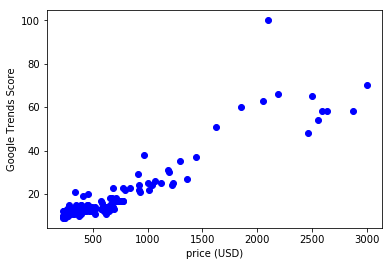

In [14]:
plt.plot(data[:,1],data[:,0], "bo")
plt.xlabel('price (USD)')
plt.ylabel('Google Trends Score')
plt.show()

In [15]:
# Normalize the data
X = (data[:,1] - np.mean(data[:,1]))/np.std(data[:, 1])
Y = (data[:,0] - np.mean(data[:,0]))/np.std(data[:, 0])

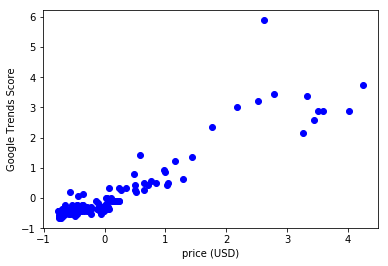

In [16]:
plt.plot(X,Y, "bo")
plt.xlabel('price (USD)')
plt.ylabel('Google Trends Score')
plt.show()

In [17]:
def simplest_neural_net(x, y, epochs, learning_rate):
    weights = np.array([0, 0])
    bias = 1.
    for e in range(epochs):
        gradient = np.array([0., 0.])
        for i in range(len(x)):
            xi = x[i]
            xi = np.array([bias, xi])
            yi = y[i]
            
            h = np.dot(weights, xi) - yi
            gradient += 2*xi*h
        
        weights = weights - learning_rate*gradient
    return weights[1], weights[0]

In [18]:
# Here the ideal values for slope and y-intercept are converged upon
m, b = simplest_neural_net(X,Y,100, 1e-3)
target_m = m
target_b = b

In [19]:
x_points = np.linspace(np.min(X), np.max(X), 10)
line = b + m*x_points

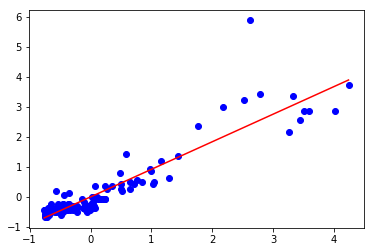

In [20]:
plt.plot(X,Y, 'bo', x_points, line, 'r-')
plt.show()

Cool, there seems to be a correlation here based on the line of best fit produced by the neural net's emulation of linear regression. Maybe you should check Google Trends next time you are thinking about buying bitcoin.

But deciding if we should buy bitcoin or not isn't why we are here...

# Learning Rate Optimization

To perform a bayesian optimization of the learning rate I will take the value for the *slope* and *y intercept* that I converged upon over many epochs above and use those values as a model in an evalutation function. In the evaluation function below I drastically reduced the amount of epochs the nerual net is being given to fit the data. Given it doesn't have enough epochs to converge on the ideal *slope* and *y intercept* we will be able to see which learning rate gets the neural net closest to the ideal values in a short amount of epochs.

In [21]:
from sklearn.metrics import mean_squared_error

def evaluation_fxn(x, y, learn_rate, ideal_m, ideal_b):
    x_points = np.linspace(np.min(x), np.max(x), 10)
    ideal_line = ideal_m*x_points + ideal_b
    m, b = simplest_neural_net(x,y,5,learn_rate)
    test_line = m*x_points + b
    
    return 1 - mean_squared_error(ideal_line, test_line)
    

In [22]:
# Make some inital guesses about the learning rate and evaluate them
# The Gaussian Process will be fit to this data initially.
guesses = [6e-3,1e-3,1e-4]

outcomes = [evaluation_fxn(X,Y,guess, target_m, target_b)
                     for guess in guesses]


In [23]:
from sklearn.gaussian_process import GaussianProcess
import warnings
warnings.filterwarnings('ignore')

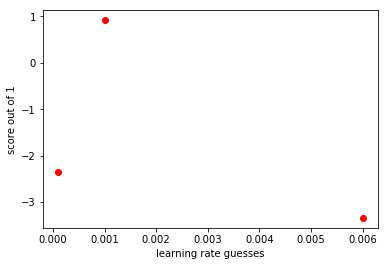

In [24]:
plt.plot(guesses,outcomes,'ro')
plt.xlabel('learning rate guesses')
plt.ylabel('score out of 1')
plt.show()

In [25]:
def hyperparam_selection(guesses, outcomes):
    guesses = np.array(guesses)
    outcomes = np.array(outcomes)
    gp = GaussianProcess(corr='squared_exponential',
                         theta0=1e-1, thetaL=1e-3, thetaU=1)
    
    gp.fit(guesses.reshape((-1,1)), outcomes)
    
    x = np.linspace(np.min(guesses), np.max(guesses), 10)
    
    mean, var = gp.predict(x.reshape((-1,1)), eval_MSE=True)
    std = np.sqrt(var)
    
    expected_improv_lower = mean - 1.96 * std
    expected_improv_upper = mean + 1.96 * std
    
    acquisition_curve = expected_improv_upper - expected_improv_lower
    
    
    idx = acquisition_curve.argmax()
    
    next_param = x[idx]
    
    plt.plot(guesses,outcomes,'ro', label='observations')
    plt.plot(x,mean, 'b--', label='posterior mean')
    plt.plot(x, expected_improv_lower, 'g--', label='variance')
    plt.plot(x, expected_improv_upper, 'g--')
    plt.plot(x, acquisition_curve, 'k--', label='acquisition fxn')
    plt.plot(x[idx],acquisition_curve[idx], 'yX', label='next guess')
    plt.xlabel('learning rate')
    plt.ylabel('score out of 1')
    plt.legend(loc='best')
    plt.show()
    
    return next_param

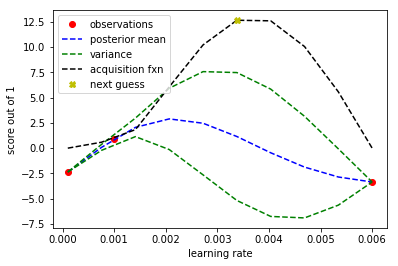

Suggested learning rate:  0.00337777777778


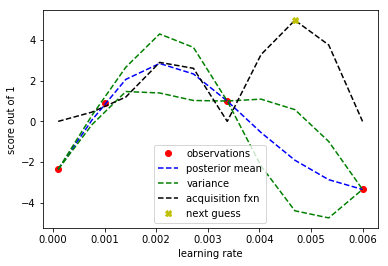

Suggested learning rate:  0.00468888888889


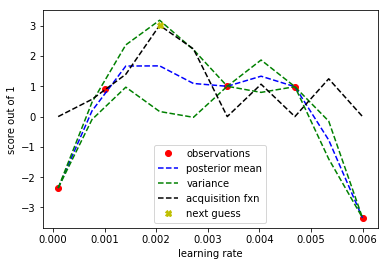

Suggested learning rate:  0.00206666666667


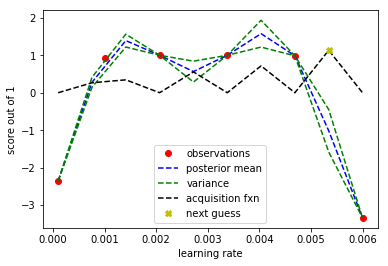

Suggested learning rate:  0.00534444444444


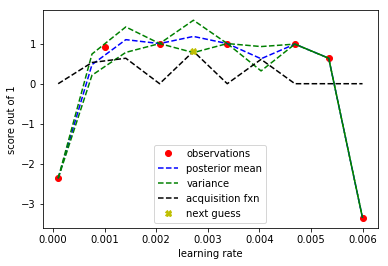

Suggested learning rate:  0.00272222222222


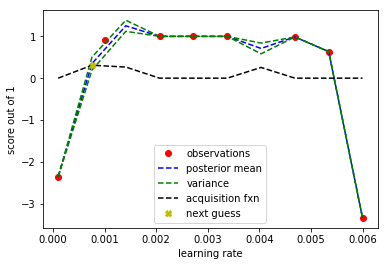

Suggested learning rate:  0.000755555555556


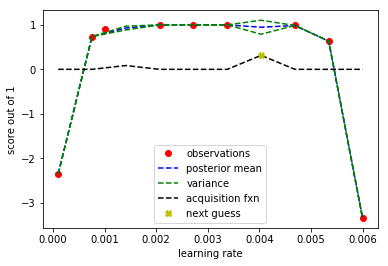

Suggested learning rate:  0.00403333333333


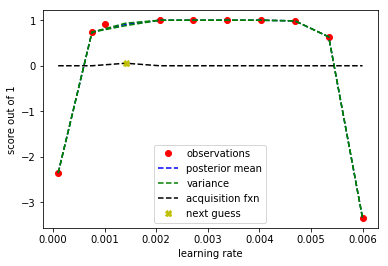

Suggested learning rate:  0.00141111111111


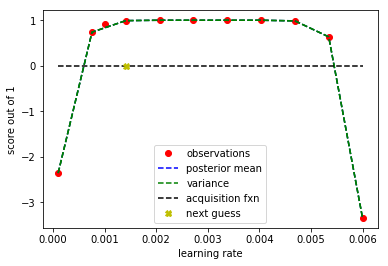

Suggested learning rate:  0.00141111111111
optimal learning rate found


In [27]:
for _ in range(10):
    
    try:
        new_learning_rate = hyperparam_selection(guesses,outcomes) 
    except:
        print("optimal learning rate found")
        break
    
    guesses.append(new_learning_rate)
    score = evaluation_fxn(X,Y,new_learning_rate, target_m, target_b)
    print("Suggested learning rate: ",new_learning_rate)
    outcomes.append(score)

Here we found an optimizated learning rate by using an acquisition function. This acquisition function identified the next guess for the hyperparameter by taking the posterior mean plus a constant times the variance. 